# Seoul CCTV analysis (by region: 'Gu')

Analysis will cover

    **Where are CCTV mostly installed**
    **Poplulation to CCTV ration CCV**
    **CCTV status visulaizaiton**


* The text include Korean as data is derived from Korean Goverment database

## Import Data +cleaning 

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
CCTV_Seoul = pd.read_csv('C:/Users/Tae Hyung/Desktop/Data Project/Seoul CCTV Analysis/CCTV_Seoul.csv', encoding = "cp949")

In [4]:
CCTV_Seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [5]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년'],
      dtype='object')

In [6]:
## column명: 기관명 --> 구별

CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0]: '구별'}, inplace= True)
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [7]:
Pop_Seoul = pd.read_excel('C:/Users/Tae Hyung/Desktop/Data Project/Seoul CCTV Analysis/Population_Seoul.xls')
Pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2019.2/4,합계,4304243,10041574,4899133,5142441,9757144,4762711,4994433,284430,136422,148008,2.27,1451564
3,2019.2/4,종로구,73828,162413,78657,83756,152026,74190,77836,10387,4467,5920,2.06,27155
4,2019.2/4,중구,62156,136276,66919,69357,126143,62086,64057,10133,4833,5300,2.03,22749


#### Table above: the first 3 rows are all 'Titles' --> needd to get rid of the latter two rows

In [8]:
Pop_Seoul = pd.read_excel('C:/Users/Tae Hyung/Desktop/Data Project/Seoul CCTV Analysis/Population_Seoul.xls',
                       header = 2,
                       usecols = 'B, D, G, J, N',
                       encoding = 'cp949')
Pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10041574,9757144,284430,1451564
1,종로구,162413,152026,10387,27155
2,중구,136276,126143,10133,22749
3,용산구,245069,229122,15947,38259
4,성동구,312991,304936,8055,43370


#### Change column names

In [9]:
Pop_Seoul.rename(columns={Pop_Seoul.columns[0] : '구별',
                        Pop_Seoul.columns[1] : '인구수',
                        Pop_Seoul.columns[2] : '한국인',
                        Pop_Seoul.columns[3] : '외국인',
                        Pop_Seoul.columns[4] : '고령자'}, inplace = True)

In [10]:
Pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10041574,9757144,284430,1451564
1,종로구,162413,152026,10387,27155
2,중구,136276,126143,10133,22749
3,용산구,245069,229122,15947,38259
4,성동구,312991,304936,8055,43370


### Analyzing the status (count) of CCTV ins Korea 

In [11]:
import pandas as pd
import numpy as np

In [12]:
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [13]:
CCTV_Seoul.sort_values(by ='소계', ascending = True).head(5)

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71
24,중 랑 구,1068,NaN,NaN,NaN,770,102,121,66,9
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
22,종 로 구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중 구,1544,25.0,165.0,114.0,80,245,270,317,328


In [14]:
CCTV_Seoul.sort_values(by ='소계', ascending = False).head(5)

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486
16,성 북 구,3003,779.0,84.0,304.0,241,279,388,285,643
21,은 평 구,2962,1365.0,83.0,99.0,343,180,296,229,367


#### To calculate the past 3 growth rate of CCTV , Add past 3 years: 2016,2017,2018 and divide it by 2015 & before data.

In [15]:
CCTV_Seoul.dtypes

구별           object
소계            int64
2011년 이전    float64
2012년       float64
2013년       float64
2014년         int64
2015년         int64
2016년         int64
2017년         int64
2018년         int64
dtype: object

In [16]:
CCTV_Seoul

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671
5,광 진 구,1581,470.0,42.0,83.0,87,64,21,468,346
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486
7,금 천 구,1634,27.0,17.0,242.0,101,382,136,199,530
8,노 원 구,1906,481.0,117.0,203.0,80,461,298,110,156
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71


In [17]:
CCTV_Seoul.fillna(0)

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671
5,광 진 구,1581,470.0,42.0,83.0,87,64,21,468,346
6,구 로 구,3227,852.0,219.0,349.0,187,268,326,540,486
7,금 천 구,1634,27.0,17.0,242.0,101,382,136,199,530
8,노 원 구,1906,481.0,117.0,203.0,80,461,298,110,156
9,도 봉 구,858,197.0,66.0,8.0,185,59,155,117,71


In [18]:
CCTV_Seoul['2015년 이전'] = CCTV_Seoul['2015년'] + CCTV_Seoul['2014년'] + CCTV_Seoul['2013년'] + \
CCTV_Seoul['2012년'] + CCTV_Seoul['2011년 이전']

In [19]:
CCTV_Seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년 이전
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448,3431.0
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385,1027.0
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319,691.0
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254,909.0
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671,2001.0


In [20]:
#calling column titles 
cols = CCTV_Seoul.columns.tolist()

In [21]:
cols

['구별',
 '소계',
 '2011년 이전',
 '2012년',
 '2013년',
 '2014년',
 '2015년',
 '2016년',
 '2017년',
 '2018년',
 '2015년 이전']

In [22]:
## Re order Columns so that it becomes 2015 & before .....onwards

cols = ['구별',
 '소계','2015년 이전', '2011년 이전',
 '2012년',
 '2013년',
 '2014년',
 '2015년',
 '2016년',
 '2017년',
 '2018년']
cols

['구별',
 '소계',
 '2015년 이전',
 '2011년 이전',
 '2012년',
 '2013년',
 '2014년',
 '2015년',
 '2016년',
 '2017년',
 '2018년']

In [23]:
CCTV_Seoul = CCTV_Seoul[cols]
CCTV_Seoul

,구별,소계,2015년 이전,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,3431.0,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,1027.0,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,691.0,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,909.0,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,2001.0,430.0,56.0,419.0,487,609,619,694,671
5,광 진 구,1581,746.0,470.0,42.0,83.0,87,64,21,468,346
6,구 로 구,3227,1875.0,852.0,219.0,349.0,187,268,326,540,486
7,금 천 구,1634,769.0,27.0,17.0,242.0,101,382,136,199,530
8,노 원 구,1906,1342.0,481.0,117.0,203.0,80,461,298,110,156
9,도 봉 구,858,515.0,197.0,66.0,8.0,185,59,155,117,71


In [24]:
#### Fill 'NaN' --> with 0 

CCTV_Seoul.fillna(0)

,구별,소계,2015년 이전,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,3431.0,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,1027.0,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,691.0,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,909.0,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,2001.0,430.0,56.0,419.0,487,609,619,694,671
5,광 진 구,1581,746.0,470.0,42.0,83.0,87,64,21,468,346
6,구 로 구,3227,1875.0,852.0,219.0,349.0,187,268,326,540,486
7,금 천 구,1634,769.0,27.0,17.0,242.0,101,382,136,199,530
8,노 원 구,1906,1342.0,481.0,117.0,203.0,80,461,298,110,156
9,도 봉 구,858,515.0,197.0,66.0,8.0,185,59,155,117,71


In [25]:
CCTV_Seoul = CCTV_Seoul.fillna(0)

In [26]:
CCTV_Seoul = CCTV_Seoul.drop(["2011년 이전", "2012년", "2013년","2014년","2015년"],axis = 1)

In [27]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2018년'] + CCTV_Seoul['2017년'] + CCTV_Seoul['2016년']) / CCTV_Seoul['2015년 이전']* 100

In [28]:
CCTV_Seoul.sort_values(by= '최근증가율', ascending = False).head(5)

,구별,소계,2015년 이전,2016년,2017년,2018년,최근증가율
24,중 랑 구,1068,0.0,121,66,9,inf
10,동대문구,2003,0.0,233,136,197,inf
23,중 구,1544,629.0,270,317,328,145.468998
19,영등포구,2495,1042.0,289,371,793,139.443378
15,성 동 구,2679,1251.0,201,933,294,114.148681


In [29]:
CCTV_Seoul

,구별,소계,2015년 이전,2016년,2017년,2018년,최근증가율
0,강 남 구,5221,3431.0,765,577,448,52.171379
1,강 동 구,1879,1027.0,194,273,385,82.960078
2,강 북 구,1265,691.0,254,1,319,83.068017
3,강 서 구,1617,909.0,190,264,254,77.887789
4,관 악 구,3985,2001.0,619,694,671,99.150425
5,광 진 구,1581,746.0,21,468,346,111.930295
6,구 로 구,3227,1875.0,326,540,486,72.106667
7,금 천 구,1634,769.0,136,199,530,112.483745
8,노 원 구,1906,1342.0,298,110,156,42.026826
9,도 봉 구,858,515.0,155,117,71,66.601942


### Seoul Population analysis

In [30]:
Pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10041574,9757144,284430,1451564
1,종로구,162413,152026,10387,27155
2,중구,136276,126143,10133,22749
3,용산구,245069,229122,15947,38259
4,성동구,312991,304936,8055,43370


In [31]:
Pop_Seoul.drop([0], inplace= True)
Pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162413,152026,10387,27155
2,중구,136276,126143,10133,22749
3,용산구,245069,229122,15947,38259
4,성동구,312991,304936,8055,43370
5,광진구,369470,353878,15592,46773


#### See if there are any repititions in'Gu' column of  'Pop_Seoul data'--> unique

In [32]:
Pop_Seoul["구별"].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

#### See if there is any NaN values --> is.null

In [33]:
Pop_Seoul[Pop_Seoul['구별'].isnull()]
##없음

,구별,인구수,한국인,외국인,고령자


#### Calculate the ratio of foreigners & senior population (using total population by each 'Gu' region)

In [34]:
Pop_Seoul['외국인비율'] = Pop_Seoul['외국인'] / Pop_Seoul['인구수'] * 100
Pop_Seoul['고령자 비율'] = Pop_Seoul['고령자'] / Pop_Seoul['인구수'] * 100
Pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자 비율
1,종로구,162413,152026,10387,27155,6.395424,16.719721
2,중구,136276,126143,10133,22749,7.435645,16.693328
3,용산구,245069,229122,15947,38259,6.507147,15.611522
4,성동구,312991,304936,8055,43370,2.573556,13.856628
5,광진구,369470,353878,15592,46773,4.220099,12.659485


#### Sort by population

In [35]:
Pop_Seoul.sort_values(by = '인구수', ascending = False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자 비율
24,송파구,686181,679247,6934,84740,1.010521,12.349511
16,강서구,602230,595602,6628,81965,1.100576,13.610249
23,강남구,547602,542498,5104,69011,0.932064,12.602401
11,노원구,542603,538350,4253,79046,0.783814,14.567925
21,관악구,519864,502089,17775,73693,3.419163,14.175438


#### Sort by population --> 송파구, 강서구, 강남구, 노원구, 관악구 = Top 5 most populated

#### where 외국인 is more populated?

In [36]:
Pop_Seoul.sort_values(by = '외국인', ascending = False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자 비율
19,영등포구,404229,369017,35212,56891,8.710904,14.073953
17,구로구,439328,405415,33913,64028,7.719289,14.574077
18,금천구,254061,234079,19982,36727,7.865040,14.455977
21,관악구,519864,502089,17775,73693,3.419163,14.175438
6,동대문구,363101,346501,16600,58078,4.571731,15.994999


In [37]:
Pop_Seoul.sort_values(by = '외국인비율', ascending = False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자 비율
19,영등포구,404229,369017,35212,56891,8.710904,14.073953
18,금천구,254061,234079,19982,36727,7.865040,14.455977
17,구로구,439328,405415,33913,64028,7.719289,14.574077
2,중구,136276,126143,10133,22749,7.435645,16.693328
3,용산구,245069,229122,15947,38259,6.507147,15.611522


As shown above most of the foreigners population are mostly concentrated in: (Yeongdeung po, Gu ro, Geum cheun)

Foreinger ratio (includes):Jung Gu, Yongsan (Itaewon), 

#### Senior Citizen population & ratio

In [38]:
Pop_Seoul.sort_values(by= '고령자', ascending = False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자 비율
24,송파구,686181,679247,6934,84740,1.010521,12.349511
16,강서구,602230,595602,6628,81965,1.100576,13.610249
12,은평구,488285,483730,4555,79282,0.932857,16.236829
11,노원구,542603,538350,4253,79046,0.783814,14.567925
21,관악구,519864,502089,17775,73693,3.419163,14.175438


In [39]:
Pop_Seoul.sort_values(by = '고령자 비율', ascending = False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자 비율
9,강북구,319377,315587,3790,59189,1.186685,18.532643
10,도봉구,339001,336698,2303,57367,0.679349,16.922369
1,종로구,162413,152026,10387,27155,6.395424,16.719721
2,중구,136276,126143,10133,22749,7.435645,16.693328
12,은평구,488285,483730,4555,79282,0.932857,16.236829


**So far,I have conducted brief anlaysis on CCTV & population status --> now it's time to analyze proportion of CCTV to population. --> To do so, I need to merge two files: CCTV_Seoul & CCTV_Pop and merge two data sets**

In [40]:
Pop_Seoul

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자 비율
1,종로구,162413,152026,10387,27155,6.395424,16.719721
2,중구,136276,126143,10133,22749,7.435645,16.693328
3,용산구,245069,229122,15947,38259,6.507147,15.611522
4,성동구,312991,304936,8055,43370,2.573556,13.856628
5,광진구,369470,353878,15592,46773,4.220099,12.659485
6,동대문구,363101,346501,16600,58078,4.571731,15.994999
7,중랑구,405639,400661,4978,63670,1.227200,15.696223
8,성북구,452292,440397,11895,69341,2.629938,15.331025
9,강북구,319377,315587,3790,59189,1.186685,18.532643
10,도봉구,339001,336698,2303,57367,0.679349,16.922369


## Pandas - merging two DataFrames

### Merging CCTV data & population status --> analyze  

In [41]:
Pop_Seoul = Pop_Seoul.sort_values(by= '구별', ascending = True)

In [42]:
Pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자 비율
23,강남구,547602,542498,5104,69011,0.932064,12.602401
25,강동구,428547,424235,4312,60657,1.006191,14.154107
9,강북구,319377,315587,3790,59189,1.186685,18.532643
16,강서구,602230,595602,6628,81965,1.100576,13.610249
21,관악구,519864,502089,17775,73693,3.419163,14.175438


#### @ Pop_Seoul, when  Row numbering is based on 'Gu' region, it is different from CCTV_Seoul  numbering --> unify the numbering by 'Gu' '
* 위에 보면 강남구 --> 관악구 까지 0,1,2,3,4 순서가 아님 23,25,9,16,21 이렇게 되있음

In [43]:
Pop_Seoul.index = range(len(Pop_Seoul))

In [44]:
Pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자 비율
0,강남구,547602,542498,5104,69011,0.932064,12.602401
1,강동구,428547,424235,4312,60657,1.006191,14.154107
2,강북구,319377,315587,3790,59189,1.186685,18.532643
3,강서구,602230,595602,6628,81965,1.100576,13.610249
4,관악구,519864,502089,17775,73693,3.419163,14.175438


In [45]:
CCTV_Seoul = CCTV_Seoul.sort_values(by= '구별', ascending = True)

In [46]:
CCTV_Seoul.head()

,구별,소계,2015년 이전,2016년,2017년,2018년,최근증가율
0,강 남 구,5221,3431.0,765,577,448,52.171379
1,강 동 구,1879,1027.0,194,273,385,82.960078
2,강 북 구,1265,691.0,254,1,319,83.068017
3,강 서 구,1617,909.0,190,264,254,77.887789
4,관 악 구,3985,2001.0,619,694,671,99.150425


In [47]:
# replaced 'inf' (which means: not a number) to zero

CCTV_Seoul = CCTV_Seoul.replace(float('inf'), 0)

In [48]:
CCTV_Seoul.head()

,구별,소계,2015년 이전,2016년,2017년,2018년,최근증가율
0,강 남 구,5221,3431.0,765,577,448,52.171379
1,강 동 구,1879,1027.0,194,273,385,82.960078
2,강 북 구,1265,691.0,254,1,319,83.068017
3,강 서 구,1617,909.0,190,264,254,77.887789
4,관 악 구,3985,2001.0,619,694,671,99.150425


#### could use merge, bu I used concat 

In [49]:
# data_result = pd.merge(CCTV_Seoul, Pop_Seoul,how= 'outer', on = '구별')

In [50]:
# data_result

In [51]:
## data_result.iloc[:24,6:12]

In [52]:
##data_result.replace([:24,6:12],[25:,6:12])

#### Remove by 'Gu' so it not redndant at  Pop_Seoul 

In [53]:
Pop_Seoul = Pop_Seoul.drop(columns = ["구별"])      

In [54]:
data_result = pd.concat([CCTV_Seoul,Pop_Seoul], axis = 1, join_axes = [CCTV_Seoul.index])

In [55]:
data_result.head()

,구별,소계,2015년 이전,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자 비율
0,강 남 구,5221,3431.0,765,577,448,52.171379,547602,542498,5104,69011,0.932064,12.602401
1,강 동 구,1879,1027.0,194,273,385,82.960078,428547,424235,4312,60657,1.006191,14.154107
2,강 북 구,1265,691.0,254,1,319,83.068017,319377,315587,3790,59189,1.186685,18.532643
3,강 서 구,1617,909.0,190,264,254,77.887789,602230,595602,6628,81965,1.100576,13.610249
4,관 악 구,3985,2001.0,619,694,671,99.150425,519864,502089,17775,73693,3.419163,14.175438


#### Removing meaningless columns  (행(row) 과 열(column)) 행 방향 삭제 = df.drop 열 방향 삭제 = del df

In [56]:
del data_result['2015년 이전']

In [57]:
del data_result['2016년']

In [58]:
del data_result['2017년']

In [59]:
del data_result['2018년']

In [60]:
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자 비율
0,강 남 구,5221,52.171379,547602,542498,5104,69011,0.932064,12.602401
1,강 동 구,1879,82.960078,428547,424235,4312,60657,1.006191,14.154107
2,강 북 구,1265,83.068017,319377,315587,3790,59189,1.186685,18.532643
3,강 서 구,1617,77.887789,602230,595602,6628,81965,1.100576,13.610249
4,관 악 구,3985,99.150425,519864,502089,17775,73693,3.419163,14.175438


#### Set the 'Gu' name as index for visualizations (graphs) 

#### set_index

In [61]:
data_result.set_index('구별', inplace = True)

In [62]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자 비율
구별,,,,,,,,
강 남 구,5221,52.171379,547602,542498,5104,69011,0.932064,12.602401
강 동 구,1879,82.960078,428547,424235,4312,60657,1.006191,14.154107
강 북 구,1265,83.068017,319377,315587,3790,59189,1.186685,18.532643
강 서 구,1617,77.887789,602230,595602,6628,81965,1.100576,13.610249
관 악 구,3985,99.150425,519864,502089,17775,73693,3.419163,14.175438


#### Find the 'correlation coefficient' of Senior Citizen ratio, Foreign population ratio, population with CCTV data 


* If absolute value of correlation coefficient:  

    * <0.1 == not correlated
    * <0.3 이면 somewhat correlated
    * <0.7 highly correlated

* use numpy corrcoef --> np.corrcoef() 

**A correlation coefficient is used in statistics to describe a pattern or relationship between two variables. A negative correlation describes the extent to which two variables move in opposite directions. For example, for two variables, X and Y, an increase in X is associated with a decrease in Y. A negative correlation coefficient is also referred to as an inverse correlation.**

In [63]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.05029785],
       [-0.05029785,  1.        ]])

In [64]:
np.corrcoef(data_result['고령자 비율'], data_result['소계'])

array([[ 1.        , -0.41965576],
       [-0.41965576,  1.        ]])

In [65]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.37429764],
       [0.37429764, 1.        ]])

** As shown above, foreingers, senior citizes has NEGATIVE correlation coefficent; 

* Population with 0.37 is sightly correlated  --> THus use population to analyze 

In [66]:
data_result.sort_values(by='소계', ascending = False).head(10)           #소계 = # of CCTV

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자 비율
구별,,,,,,,,
강 남 구,5221,52.171379,547602,542498,5104,69011,0.932064,12.602401
관 악 구,3985,99.150425,519864,502089,17775,73693,3.419163,14.175438
구 로 구,3227,72.106667,439328,405415,33913,64028,7.719289,14.574077
성 북 구,3003,78.008299,452292,440397,11895,69341,2.629938,15.331025
은 평 구,2962,43.091787,488285,483730,4555,79282,0.932857,16.236829
서 초 구,2835,54.076087,435631,431360,4271,55853,0.980417,12.821172
양 천 구,2775,90.198766,465095,461051,4044,59731,0.869500,12.842753
성 동 구,2679,114.148681,312991,304936,8055,43370,2.573556,13.856628
영등포구,2495,139.443378,404229,369017,35212,56891,8.710904,14.073953


In [67]:
data_result.sort_values(by='인구수',ascending = False).head(10)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자 비율
구별,,,,,,,,
송 파 구,1586,62.833676,686181,679247,6934,84740,1.010521,12.349511
강 서 구,1617,77.887789,602230,595602,6628,81965,1.100576,13.610249
강 남 구,5221,52.171379,547602,542498,5104,69011,0.932064,12.602401
노 원 구,1906,42.026826,542603,538350,4253,79046,0.783814,14.567925
관 악 구,3985,99.150425,519864,502089,17775,73693,3.419163,14.175438
은 평 구,2962,43.091787,488285,483730,4555,79282,0.932857,16.236829
양 천 구,2775,90.198766,465095,461051,4044,59731,0.869500,12.842753
성 북 구,3003,78.008299,452292,440397,11895,69341,2.629938,15.331025
구 로 구,3227,72.106667,439328,405415,33913,64028,7.719289,14.574077


#### Need to visually compare 'Gu's with many CCTVs  installed vs. Gu's with large population

* matplotlib doesn't support Korean --> need to change matplotlib phonts

In [68]:
import matplotlib.pyplot as plt

In [69]:
%matplotlib inline

In [70]:
import platform

In [71]:
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

In [72]:
if platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font',family = font_name)
else:
    print('Unknown system...sorry')

In [73]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자 비율
구별,,,,,,,,
강 남 구,5221,52.171379,547602,542498,5104,69011,0.932064,12.602401
강 동 구,1879,82.960078,428547,424235,4312,60657,1.006191,14.154107
강 북 구,1265,83.068017,319377,315587,3790,59189,1.186685,18.532643
강 서 구,1617,77.887789,602230,595602,6628,81965,1.100576,13.610249
관 악 구,3985,99.150425,519864,502089,17775,73693,3.419163,14.175438


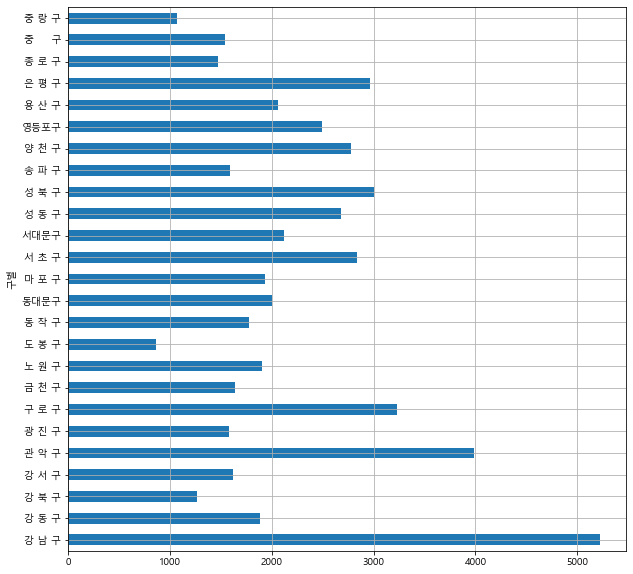

In [74]:
data_result['소계'].plot(kind='barh',grid=True, figsize=(10,10))
plt.show()

##### reorder the figure above in desceding order

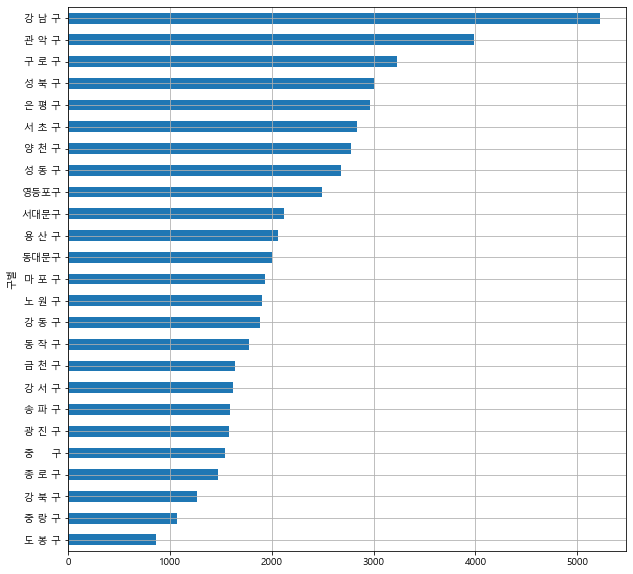

In [75]:
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

### CCTV ratio by population

In [76]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100

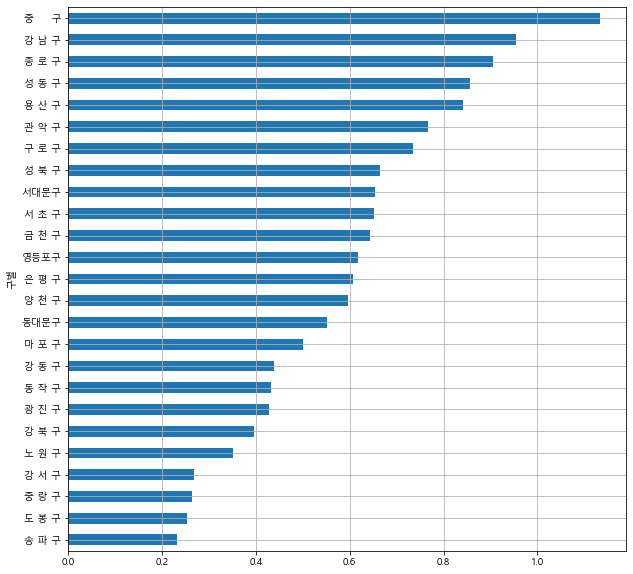

In [77]:
data_result['CCTV비율'].sort_values().plot(kind='barh',grid=True, figsize=(10,10))

## Scatter function

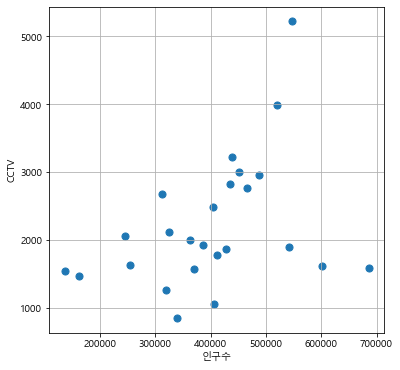

In [78]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'],s=50)
plt.xlabel("인구수")
plt.ylabel('CCTV')
plt.grid()
plt.show()

#### drawing representative line (showing correlation)

In [79]:
fp1= np.polyfit(data_result['인구수'],data_result['소계'],1)
fp1

array([2.82277056e-03, 1.08591762e+03])

In [80]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000,100)

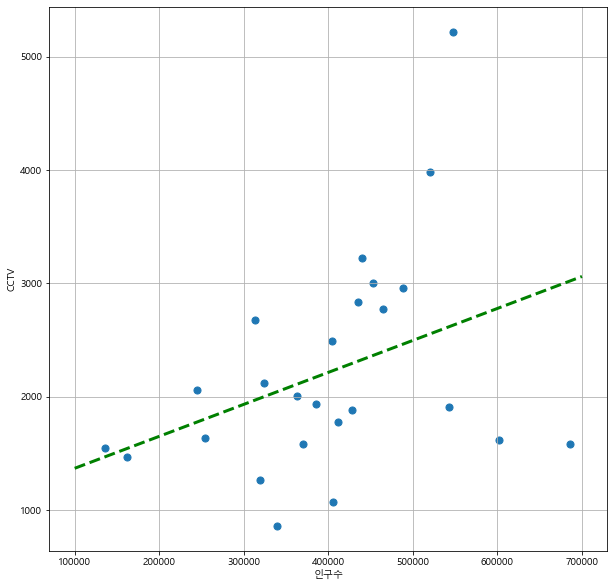

In [81]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'],s=50)
plt.plot(fx,f1(fx), ls = 'dashed', lw=3, color='g')
plt.xlabel("인구수")
plt.ylabel('CCTV')
plt.grid()
plt.show()

#### want to add 2 things
1. if a single line shown above represents the whole sample I want the cities that are distant from the "standard" to be labeled.
2. I want to use color gradient to show that the sample turns in to different color as it goes further away from the "standard"

In [82]:
fp1= np.polyfit(data_result['인구수'],data_result['소계'],1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000,700000,100)

data_result['오차'] =np.abs(data_result['소계'] - f1(data_result['인구수']))
df_sort=data_result.sort_values(by='오차', ascending = False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자 비율,CCTV비율,오차
구별,,,,,,,,,,
강 남 구,5221,52.171379,547602,542498,5104,69011,0.932064,12.602401,0.953430,2589.327575
송 파 구,1586,62.833676,686181,679247,6934,84740,1.010521,12.349511,0.231134,1436.849146
관 악 구,3985,99.150425,519864,502089,17775,73693,3.419163,14.175438,0.766547,1431.625585
도 봉 구,858,66.601942,339001,336698,2303,57367,0.679349,16.922369,0.253097,1184.839664
강 서 구,1617,77.887789,602230,595602,6628,81965,1.100576,13.610249,0.268502,1168.874735


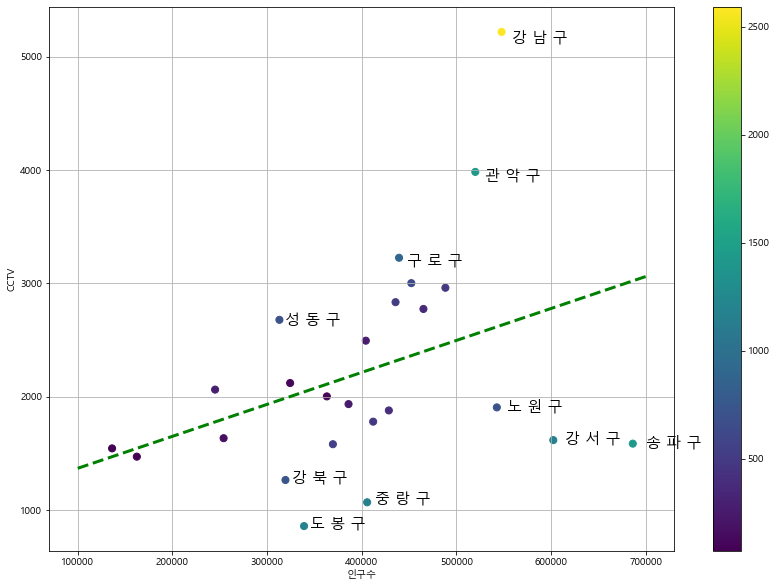

In [85]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'],
           c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed',lw=3, color = 'g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,
            df_sort.index[n], fontsize = 15)
    
plt.xlabel("인구수")
plt.ylabel('CCTV')

plt.colorbar()
plt.grid()
plt.show()
    

### Final Analysis

Seoul regions above the regression line (green), 'Gangnam Gu','Gwanak Gu', "Guro gu, 'Sungdong gu' indicates that those regions have more CCTVs than average.Alike, the regions below the regression line: 'Gangbuk-gu', 'Dobong-gu', 'Jungryang-gu', 'Nowon-gu', 'Gangseo-gu, and 'Songpa-gu' has less CCTV installed than average.

Gangnam-gu has extremely large amounts of CCTV installed whereas Songpa-gu extremely lacks # off CCTV compared to its' population.